## Raw Data Tracer Plots

In [1]:
path = 'raw_demo_plots/'

In [2]:
from matplotlib.mlab import griddata
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

title_sz = 27
axis_sz = 22
tick_sz = 21
rcParams.update({'font.size': tick_sz-4}) # Increase font-size

import matplotlib.cm as cm

import numpy as np
from numpy import linspace
from numpy import meshgrid

import pylab as pl
from collections import defaultdict

from scipy import stats
from scipy.interpolate import UnivariateSpline
from scipy.signal import argrelextrema

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
from chem_ocean.ocean_data import dataFetcher
from chem_ocean.ocean_plt import rawPlotter
from chem_ocean.ocean_plt_util import save_name
import chem_ocean.ocean_analysis as oc_an

['plan']
12.0
0.6203298568725586


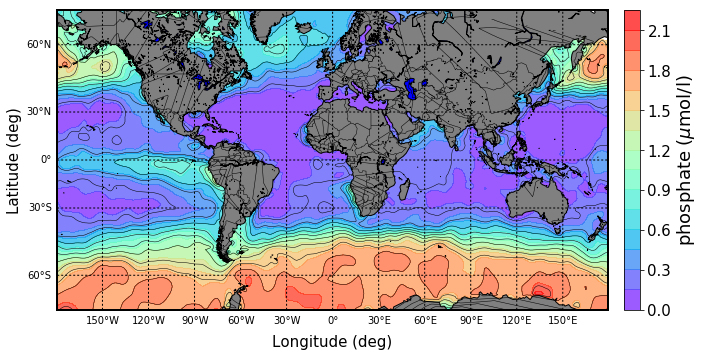

In [22]:
ptlat = 43.5
ptlon = 39.5

tracer = 'phosphate'
minlat, maxlat, minlon, maxlon = -70, 70,-180, 180
slice_type = 'plan'
dpth = 0

newPlot = rawPlotter([slice_type], [tracer])
fig, ax_out = newPlot.make()

dataset = dataFetcher()
dataset.get_plan([minlat, maxlat],[minlon, maxlon], [tracer], dpth)

fig, ax_out[0] = newPlot.add_plan(fig, ax_out[0], dataset, tracer, dpth)

name1 = save_name(tracer, slice_type, minlat, maxlat, minlon, maxlon, depth = dpth)
# plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)


In [10]:
name1 = save_name(tracer, 'section', minLat, maxLat, lineLon, lineLon)+'__70s-80n_25-25w'
print(name1)

phosphate_section_70s-80n_175-175w__70s-80n_25-25w


['section', 'section']
salinity_section_70s-80n_175-175w__70s-80n_25-25w


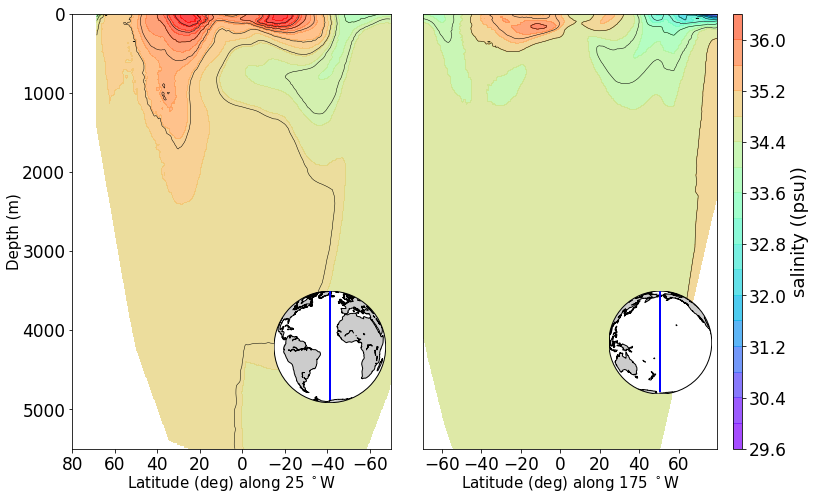

In [4]:
ptlat, ptlon = -58, -25
lineLon = -25
minLat, maxLat = -70, 80
tracer = 'salinity'

newPlot = rawPlotter(['section', 'section'], [tracer])
fig, ax_out = newPlot.make()

dataset = dataFetcher()
# dataset.get_plan([-70, 70],[-180, 180], [tracer], 1500)
dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
# datasest.get_section('EW_section', lineLat, [minLon, maxLon], [tracer])
maxdepth_1 = max(dataset._d)

# fig, ax_out[0] = newPlot.add_plan(fig, ax_out[0], dataset, tracer, 1500)
fig, ax_out[0] = newPlot.add_section(fig, ax_out[0], dataset, tracer, colorbar = 'n', share_limits =[30,37])
# ax_out[0].axvline(x=ptlat, color='k', linestyle='--')
# ax_out[0].set_ylim([maxdepth, 0])
ax_out[0].set_xlim([maxLat, minLat])

lineLon = -175
dataset2 = dataFetcher()
dataset2.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
maxdepth_2 = max(dataset2._d)


# dataset2.get_column([ptlat, ptlat+2], [ptlon, ptlon+2], [tracer])
# ax_out[0].scatter(np.ones(len(dataset2._d))*ptlat, dataset2._d, c = color)

fig, ax_out[1] = newPlot.add_section(fig, ax_out[1], dataset2, tracer, colorbar = 'y', share_limits =[30,37])
ax_out[1].yaxis.set_visible(False)

ax_out[0].set_ylim([max(maxdepth_1, maxdepth_2), 0])
ax_out[1].set_ylim([max(maxdepth_1, maxdepth_2), 0])
# fig, ax_out[1] = newPlot.add_column(fig, ax_out[1], dataset2, tracer)
# ax_out[1].plot(_feat_data, _d)

# ax_out[1].plot(_d, _feat_data_prime)
# ax_out[1].plot(_d, np.zeros(len(_feat_data_prime)))
# ax_out[1].scatter(_feat_data[extrema1], _d[extrema1])# np.zeros(len(extrema1))) #max and min of concentration; d/d[a] = 0
# ax_out[1].scatter(_feat_data[extrema2], _d[extrema2])
# ax_out[1].set_ylim([maxdepth, 0])

# for extrema in extrema2:
#     ax_out[0].axhline(y=_d[extrema], color='k', linestyle='--')

# name1 = save_name(tracer, 'section', minLat, maxLat, minLon, maxLon)

name1 = save_name(tracer, 'section', minLat, maxLat, lineLon, lineLon)+'__70s-80n_25-25w'
print(name1)

# plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)


## Two sides of the pair
(for formatting purposes)

In [25]:
tracer = 'oxygen'

['section']
13.0
0 10
oxygen_section_80s-80n_150-150w


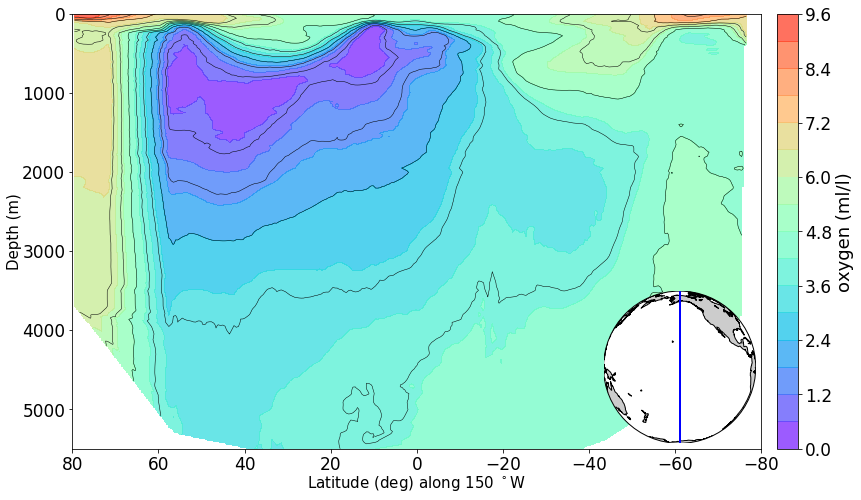

In [26]:
ptlat, ptlon = -58, -25
lineLon = -150
minLat, maxLat = -80, 80
# tracer = 'oxygen'

newPlot = rawPlotter([ 'section'], [tracer])
fig, ax_out = newPlot.make()


# lineLon = -150
dataset2 = dataFetcher()
dataset2.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
maxdepth_2 = max(dataset2._d)

fig, ax_out[0] = newPlot.add_section(fig, ax_out[0], dataset2, tracer, colorbar = 'y', share_limits =True)
ax_out[0].set_xlim([maxLat, minLat])
ax_out[0].set_ylim([5500, 0])

name1 = save_name(tracer, 'section', minLat, maxLat, lineLon, lineLon)
print(name1)

plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)


['section']
12.0
0 4
phosphate_section_80s-80n_15-15w


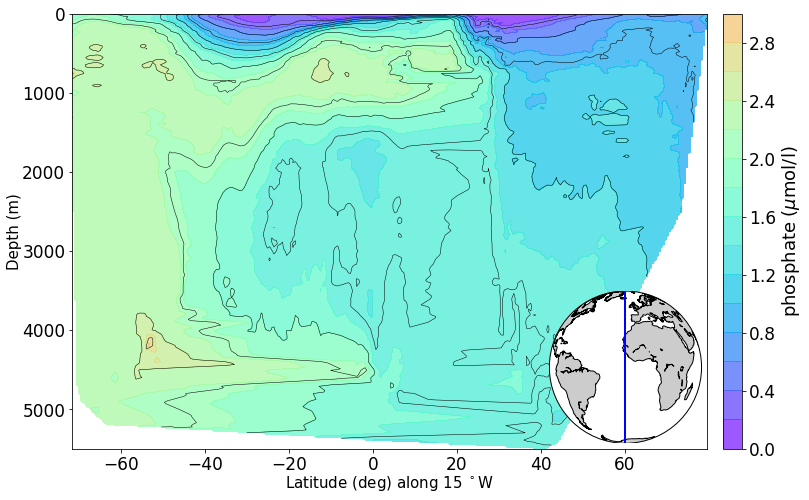

In [22]:
ptlat, ptlon = -58, -25
lineLon = -15
minLat, maxLat = -80, 80
# tracer = 'oxygen'

newPlot = rawPlotter(['section'], [tracer])
fig, ax_out = newPlot.make()

dataset = dataFetcher()
dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
maxdepth_1 = max(dataset._d)

fig, ax_out[0] = newPlot.add_section(fig, ax_out[0], dataset, tracer, colorbar = 'y', share_limits =True)

# ax_out[0].set_xlim([maxLat, minLat])
# ax_out[0].yaxis.set_visible(False)
ax_out[0].set_ylim([5500, 0])

name1 = save_name(tracer, 'section', minLat, maxLat, lineLon, lineLon)
print(name1)

plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)


['section', 'column']


(5500.0, 0)

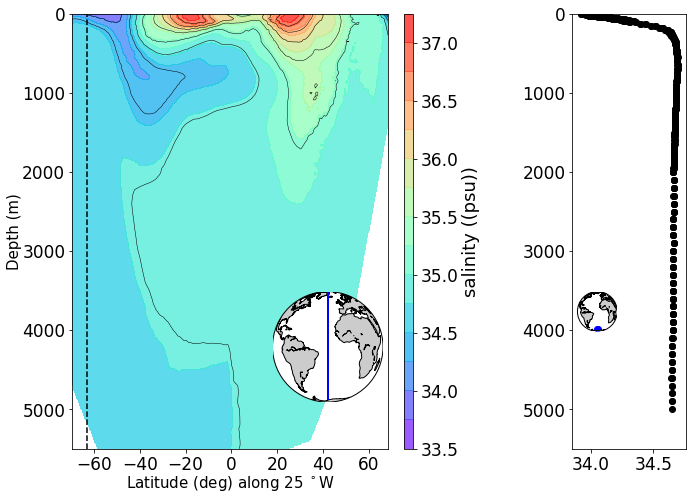

In [75]:
ptlat, ptlon = -63, -25
lineLon = -25
minLat, maxLat = -70, 80
tracer = 'salinity'

newPlot = rawPlotter(['section', 'column'], [tracer])
fig, ax_out = newPlot.make()

dataset = dataFetcher()
# dataset.get_plan([-70, 70],[-180, 180], [tracer], 1500)
dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
# datasest.get_section('EW_section', lineLat, [minLon, maxLon], [tracer])
maxdepth = max(dataset._d)

# fig, ax_out[0] = newPlot.add_plan(fig, ax_out[0], dataset, tracer, 1500)
fig, ax_out[0] = newPlot.add_section(fig, ax_out[0], dataset, tracer, colorbar = 'y', share_limits = False)
ax_out[0].axvline(x=ptlat, color='k', linestyle='--')
ax_out[0].set_ylim([maxdepth, 0])

dataset2 = dataFetcher()
dataset2.get_column([ptlat, ptlat+2], [ptlon, ptlon+2], [tracer])

fig, ax_out[1] = newPlot.add_column(fig, ax_out[1], dataset2, tracer)

ax_out[1].set_ylim([maxdepth, 0])

